In [187]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import imshow
import math
import numpy as np
from glob import glob

각 클래스의 이미지들이 저장되어 있는 폴더에서 데이터 불러오기 <br>
InceptionNet 입력 포맷 : 299x299

In [188]:
# from google.colab import drive
# drive.mount('/content/drive')

In [189]:
all_globs = glob('data/imgs/data_mw/man/*jpg') + glob('data/imgs/data_mw/woman/*jpg')

images = []
for p in all_globs:
    try:
        images.append(image.load_img(p, target_size=(299, 299)))
    except:
        pass

vector = np.asarray([image.img_to_array(img) for img in images])
# glob() : 특정 폴더에 존재하는 파일들의 경로를 읽어 옮

In [190]:
vector.shape

(337, 299, 299, 3)

InceptionNet (version3) 호출

In [191]:
base_model = InceptionV3(weights='imagenet', include_top=True)

In [192]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_376 (Batch  (None, 149, 149, 32  96         ['conv2d_376[0][0]']             
 Normalization)                 )                                                      

합성곱층 (convolutional layers) 부분에서 출력하는 feature 정보
<br> 합성곱층에 해당하는 부분만 추출. <br>
Model 클래스를 이용해서 입력부분과 출력부분 지정

In [193]:
basic_model1 = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)


# inputs=base_model : InceptionV3 모델의 입력과 동일

# outputs=base_model.get_layer('avg_pool').output:
       # 모델의 출력 InceptionV3 모델의 'avg_pool' 레이어의 출력

In [194]:
basic_model1.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_376 (Batch  (None, 149, 149, 32  96         ['conv2d_376[0][0]']             
 Normalization)                 )                                                           

In [195]:
vectors = basic_model1.predict(preprocess_input(vector))
# avg_pool 층이 출력하는 feature 정보를 얻음
# preprocess_input() : 입력 데이터 값 normalization

11/11 [==============================] - 2s 105ms/step


In [196]:
vectors.shape
#이미지 별 2048개의 피처 정보

(337, 2048)

In [197]:
vectors[0]

array([0.39069575 , 0.16688454 , 0.029360862, ..., 0.29523864 ,
       0.07540934 , 0.086643316], dtype=float32)

In [198]:
# vectors1 = basic_model1.predict(vector/255)
# 입력값 0 ~ 1로 변환

In [199]:
len(vectors)

337

종속변수 생성 <--- 폴더 정보 사용 <br>
‘b’ 폴더에 있는 이미지의 종속변수 값을 1로 , <br>
‘e’ 폴더에 있는 이미지의 종속변수 값을 0으로

In [200]:
labels =  [1] * (glob('data/imgs/data_mw/man/*jpg').__len__()-1)\
        + [0] * glob('data/imgs/data_mw/woman/*jpg').__len__()
# labels = [1] * 179 + [0] * 142
# b => 1, e => 0 으로 labeling
# 첫번째 폴더에 존재하는 이미지들(b)의 정답을 1로,
# 두번째 폴더에 존재하는 이미지들(e)의 정답을 0으로 설정

In [201]:
print(labels)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [202]:
# 학습 데이터와 평가 데이터 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, labels, test_size=0.2)
# b => 1, e => 0

In [203]:
X_train.shape

(269, 2048)

In [204]:
len(y_train)

269

In [205]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [206]:
lr_p1 = LogisticRegression(C=1, penalty='l1', solver='saga', max_iter=10000)
lr_p1.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='saga')

In [207]:
lr_p1.score(X_test, y_test)

0.8676470588235294

In [208]:
lr_p2 = LogisticRegression(C=1, penalty='l2', solver='saga', max_iter=1000)
lr_p2.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, solver='saga')

In [209]:
lr_p2.score(X_test, y_test)

0.8529411764705882

In [210]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
lr_p2.predict_proba(vectors[0].reshape(1, -1))

array([[0.0011786819, 0.9988213   ]], dtype=float32)

In [211]:
lr_p2.predict(vectors[0].reshape(1, -1))

array([1])

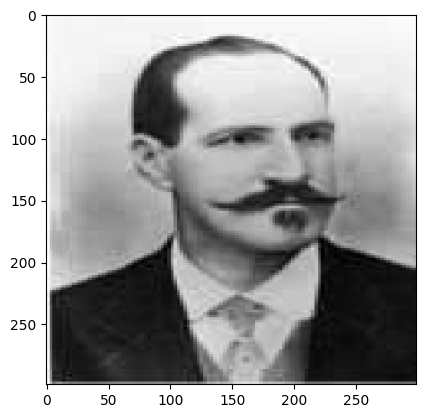

In [212]:
imshow(np.asarray(images[0]))

## 다른 분류 알고리즘 적용

In [287]:
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [312]:
models = [LinearSVC() ,MLPClassifier() ,GaussianProcessClassifier() ,LogisticRegression(), SVC(probability=True), GaussianNB(), DecisionTreeClassifier(),
          RandomForestClassifier(), KNeighborsClassifier(), GradientBoostingClassifier(),
          AdaBoostClassifier(), ExtraTreesClassifier(), HistGradientBoostingClassifier(),
          LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), BaggingClassifier(),
          RidgeClassifier(), Perceptron(), MLPClassifier(), GaussianProcessClassifier(),
          ComplementNB(), BernoulliNB(), NuSVC(), xgb.XGBClassifier()]

best_model_score = 0
model_over_85 = []


for model in models:
    model.fit(X_train,y_train)
    model_score = model.score(X_test,y_test)
    
    model_name = str(model)[:25].ljust(25)
    f1 = f1_score(y_test, model.predict(X_test))

    print(f'모델 이름 {model_name}',end=', ')
    print('정확도:', model.score(X_test,y_test), end=', ')
    print(f'f1 스코어 점수 : {f1:0.5f}')

    if best_model_score < model_score:
        best_model_score = model_score
        best_model = model

모델 이름 LinearSVC()              , 정확도: 0.8823529411764706, f1 스코어 점수 : 0.87879
모델 이름 MLPClassifier()          , 정확도: 0.8382352941176471, f1 스코어 점수 : 0.83582
모델 이름 GaussianProcessClassifier, 정확도: 0.7647058823529411, f1 스코어 점수 : 0.75758
모델 이름 LogisticRegression()     , 정확도: 0.8529411764705882, f1 스코어 점수 : 0.85294
모델 이름 SVC(probability=True)    , 정확도: 0.8529411764705882, f1 스코어 점수 : 0.85294
모델 이름 GaussianNB()             , 정확도: 0.8529411764705882, f1 스코어 점수 : 0.84375
모델 이름 DecisionTreeClassifier() , 정확도: 0.6323529411764706, f1 스코어 점수 : 0.64789
모델 이름 RandomForestClassifier() , 정확도: 0.7941176470588235, f1 스코어 점수 : 0.78788
모델 이름 KNeighborsClassifier()   , 정확도: 0.7205882352941176, f1 스코어 점수 : 0.73973
모델 이름 GradientBoostingClassifie, 정확도: 0.8382352941176471, f1 스코어 점수 : 0.84507
모델 이름 AdaBoostClassifier()     , 정확도: 0.7647058823529411, f1 스코어 점수 : 0.76471
모델 이름 ExtraTreesClassifier()   , 정확도: 0.8382352941176471, f1 스코어 점수 : 0.83582
모델 이름 HistGradientBoostingClass, 정확도: 0.8529411764705882, f1 스코어

In [314]:
best_model, best_model_score

(LinearSVC(), 0.8823529411764706)